# Thermal Expansion Coefficient
## Example E13 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)


### Gaussian Inputs

E13 first gives the calculation assuming all Gaussian inputs. It computes mean value and expanded uncertainties at 95% and 99% coverage.

In [1]:
%matplotlib inline
import suncal

In [2]:
expansion = '(L1-L0)/(L0*(T1-T0))'

inputs = [{'name': 'L0', 'nom':1.4999, 'units': 'm', 'uncerts': [{'name': 'uL0', 'std':.0001}]},
          {'name': 'T0', 'nom':288.15, 'units': 'K', 'uncerts': [{'name': 'uT0', 'std':.02}]},
          {'name': 'L1', 'nom':1.5021, 'units': 'm', 'uncerts': [{'name': 'uL1', 'std':.0002}]},
          {'name': 'T1', 'nom':373.10, 'units': 'K', 'uncerts': [{'name': 'uT1', 'std':.05}]}]
u = suncal.UncertCalc(expansion, inputs=inputs)
display(u.calculate(intervals=[0.95, 0.99]))
display(u.out.report_expanded())

Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  
----------|------------|---------|------------------|--------------|---------|--------------
$f_{1}$   | GUM          | 0.0000173 1/K  | 1.8e-06 1/K           | ± 3.4e-06 1/K     | 1.960     | inf           
$f_{1}$   | Monte Carlo  | 0.0000173 1/K  | 1.8e-06 1/K           | (0.0000138 1/K, 0.0000207 1/K) | 1.960     | -

### GUM Approximation


Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|----------|---------|---------|---------|--------------|----------------------
$f_{1}$   | 99.00%     | 0.0000127 1/K  | 0.0000218 1/K  | 2.576     | inf            | 4.5e-06 1/K              
-          | 95.00%     | 0.0000138 1/K  | 0.0000207 1/K  | 1.960     | inf            | 3.4e-06 1/K              
-          | 90.00%     | 0.0000144 1/K  | 0.0000202 1/K  | 1.645     | inf            | 2.9e-06 1/K              
-          | 68.00%     | 0.0000155 1/K  | 0.0000190 1/K | 0.994     | inf            | 1.7e-06 1/K             


### Monte Carlo

Symmetric Coverage Intervals

Function   | Interval   | Min       | Max       | k        
----------|----------|---------|---------|---------
$f_{1}$   | 99.00%     | 0.000013 1/K  | 0.000022 1/K  | 2.571    
-          | 95.00%     | 0.000014 1/K  | 0.000021 1/K  | 1.960    
-          | 90.00%     | 0.000014 1/K  | 0.000020 1/K  | 1.645    
-          | 68.00%     | 0.000016 1/K  | 0.000019 1/K  | 0.995

---
### Student Inputs
Next, the example supposes the inputs are t-distributions with 3 degrees of freedom, and recalculates.

In [3]:
inputs = [{'name': 'L0', 'nom':1.4999, 'units': 'm', 'uncerts': [{'name': 'uL0', 'dist':'t', 'unc':.0001, 'df':3}]},
          {'name': 'T0', 'nom':288.15, 'units': 'K', 'uncerts': [{'name': 'uT0', 'dist':'t', 'unc':.02,   'df':3}]},
          {'name': 'L1', 'nom':1.5021, 'units': 'm', 'uncerts': [{'name': 'uL1', 'dist':'t', 'unc':.0002, 'df':3}]},
          {'name': 'T1', 'nom':373.10, 'units': 'K', 'uncerts': [{'name': 'uT1', 'dist':'t', 'unc':.05,   'df':3}]}]
u = suncal.UncertCalc(expansion, inputs=inputs)
display(u.calculate())
u.out.report_expanded(conflist=[0.95, 0.99])

Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  
----------|------------|---------|------------------|--------------|---------|--------------
$f_{1}$   | GUM          | 0.0000173 1/K  | 1.8e-06 1/K           | ± 4.7e-06 1/K     | 2.676     | 4.4           
$f_{1}$   | Monte Carlo  | 0.0000173 1/K  | 1.8e-06 1/K           | (0.0000140 1/K, 0.0000205 1/K) | 1.847     | -

### GUM Approximation


Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|----------|---------|---------|---------|--------------|----------------------
$f_{1}$   | 99.00%     | 9.7e-06 1/K  | 0.0000249 1/K  | 4.321     | 4.42           | 7.6e-06 1/K              
-          | 95.00%     | 0.0000126 1/K  | 0.0000220 1/K  | 2.676     | 4.42           | 4.7e-06 1/K              
-          | 90.00%     | 0.0000136 1/K  | 0.0000209 1/K  | 2.075     | 4.42           | 3.6e-06 1/K              
-          | 68.00%     | 0.0000153 1/K  | 0.0000192 1/K | 1.120     | 4.42           | 2.0e-06 1/K             


### Monte Carlo

Symmetric Coverage Intervals

Function   | Interval   | Min       | Max       | k        
----------|----------|---------|---------|---------
$f_{1}$   | 99.00%     | 0.000011 1/K  | 0.000023 1/K  | 3.262    
-          | 95.00%     | 0.000014 1/K  | 0.000021 1/K  | 1.847    
-          | 90.00%     | 0.000015 1/K  | 0.000020 1/K  | 1.396    
-          | 68.00%     | 0.000016 1/K  | 0.000019 1/K  | 0.731

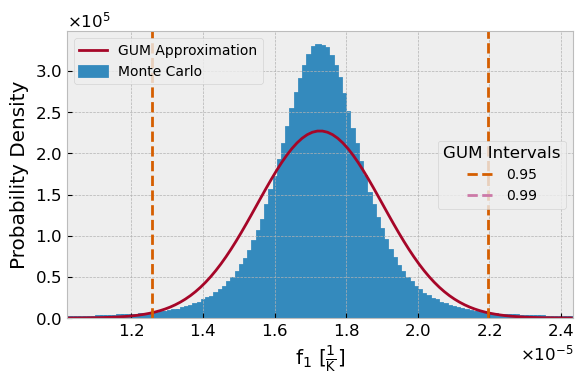

In [4]:
u.out.plot_pdf(intervals=[.95, .99]);